In [214]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [208]:
# problem 1
# readin the data
djia = pd.read_csv("DJIA.csv")
# cleaning the missing values
#djia = djia.fillna(np.nan)
values = {"VALUE": djia['VALUE'].values}
djia = pd.DataFrame(values, index = djia['DATE'])
djia[djia.VALUE == "."]= np.nan
djia.index = pd.to_datetime(djia.index)
djia.VALUE = pd.to_numeric(djia.VALUE)

In [98]:
#problem 2
# readin the data
paychecks = pd.read_csv("paychecks.csv", header = None)
date1 = pd.date_range(start = '2008-03-13', periods = (len(paychecks)+1)/2,freq = "WOM-1FRI")
date2 = pd.date_range(start = '2008-03-13', periods = (len(paychecks)-1)/2,freq = "WOM-3FRI")
date = date1.union(date2)
values = {"paychecks": paychecks[0].values}
paychecks = pd.DataFrame(values, index = date)
paychecks.index = pd.to_datetime(paychecks.index)

In [113]:
#problem4
# readin the data
finances = pd.read_csv("finances.csv")
p = pd.period_range("1978-09-01", periods = len(finances), freq="Q-DEC")
p += 1
values = {"Ear"}
finances.index = p

In [131]:
#problem 5
web_traffic = pd.read_csv("website_traffic.csv")
start = pd.to_datetime(web_traffic['ENTER'])
end = pd.to_datetime(web_traffic['LEAVE'])
duration = (end -start).mean()
print(duration)

0 days 00:05:04.731647


In [136]:
#firstly create a column with 1s 
web_traffic['Total number of visit'] = np.ones_like(range(len(web_traffic)))
web_traffic.index = start

In [150]:
visit = web_traffic['Total number of visit'].resample("H").sum()
visit.index = visit.index.to_period()
visit.index.names = ['Range']
print(visit)

Range
2016-10-07 01:00    618
2016-10-07 02:00    655
2016-10-07 03:00    670
2016-10-07 04:00    632
2016-10-07 05:00    672
2016-10-07 06:00    602
2016-10-07 07:00    660
2016-10-07 08:00    650
2016-10-07 09:00    665
2016-10-07 10:00    647
2016-10-07 11:00    605
2016-10-07 12:00    646
2016-10-07 13:00    670
2016-10-07 14:00    628
2016-10-07 15:00    607
2016-10-07 16:00    683
2016-10-07 17:00    632
2016-10-07 18:00    629
2016-10-07 19:00    702
2016-10-07 20:00    644
2016-10-07 21:00    641
2016-10-07 22:00    677
Freq: H, Name: Total number of visit, dtype: int32


In [171]:
#proble6
#daily change
dailychange = djia - djia.shift(1)
maxvalue = dailychange.VALUE.max()
maxdate = dailychange.VALUE.idxmax()
print("Date with largest gain: ", maxdate)
print("Largest gain: ", maxvalue)
minvalue = dailychange.VALUE.min()
mindate = dailychange.VALUE.idxmin()
print("Date with largest loss: ", mindate)
print("Largest loss: ", minvalue)
# monthly change
monthlychange = dailychange.resample("M").sum()
maxvalue_m = monthlychange.VALUE.max()
maxdate_m = monthlychange.VALUE.idxmax()
print("Month with largest gain: ", maxdate_m)
print("Largest monthly gain: ", maxvalue_m)
minvalue_m = monthlychange.VALUE.min()
mindate_m = monthlychange.VALUE.idxmin()
print("Month with largest loss: ", mindate_m)
print("Largest monthly loss: ", minvalue_m)

Date with largest gain:  2008-10-13 00:00:00
Largest gain:  936.42
Date with largest loss:  2008-09-29 00:00:00
Largest loss:  -777.68
Month with largest gain:  2015-10-31 00:00:00
Largest monthly gain:  1378.84
Month with largest loss:  2008-10-31 00:00:00
Largest monthly loss:  -1525.65


In [209]:
#probelm 7
rolling_30 = djia.rolling(30).mean()
rolling_365= djia.rolling(365).mean()
ewma_30 = djia['VALUE'].ewm(span = 30).mean()
ewma_365 = djia['VALUE'].ewm(span = 365).mean()

In [210]:
djia['rolling_30'] = rolling_30.VALUE.values
djia['rolling_365'] = rolling_365.VALUE.values
djia['exponential weighted ma (30)'] = ewma_30.values
djia['exponential weighted ma (365)'] = ewma_365.values


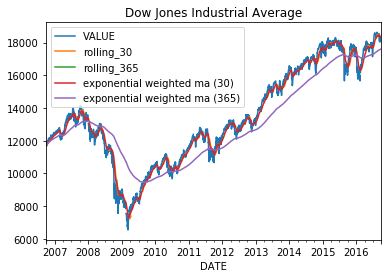

In [216]:
djia.plot(title = 'Dow Jones Industrial Average')
plt.show()

nan